In [2]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
print("torch-scatter installed")
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
print("torch-sparse installed")
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
print("torch-geometric installed")

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.6 MB/s eta 0:00:00
torch-scatter installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.3 MB/s eta 0:00:00
torch-sparse installed
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
torch-geometric installed


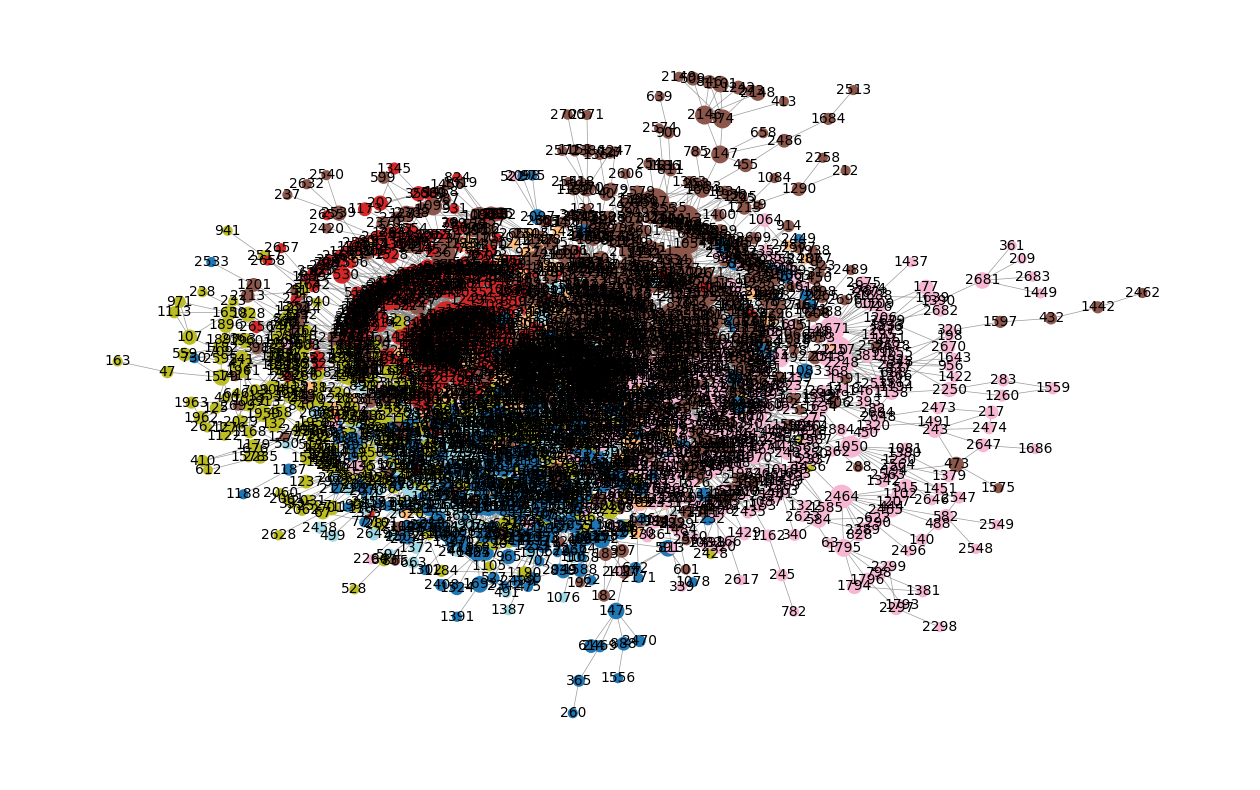

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.datasets import Planetoid

# Load the Cora Dataset
dataset = Planetoid(root='data/Cora', name='Cora')
data = dataset[0]

# Create a Networkx graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(data.y)):
    G.add_node(i, label=data.y[i].item())

# Add edges to the graph
edge_index = data.edge_index.t().tolist()
G.add_edges_from(edge_index)

# Calculate node degrees
node_degrees = dict(G.degree)

# Set node sizes based on node degrees
node_sizes = [20 * (node_degrees[node] + 1) for node in G.nodes]

# Create a color map based on node labels
num_labels = len(np.unique(data.y))
color_map = plt.get_cmap('tab20', num_labels)  # Use tab20 colormap for distinct colors

# Create a list of node colors based on node labels
node_colors = [color_map(data.y[node].item() % num_labels) for node in G.nodes]

# Draw the graph with Kamada-Kawai layout for better edge visibility
plt.figure(figsize=(16, 10))  # Larger figure size
pos = nx.kamada_kawai_layout(G)

# Draw edges with larger width for better visibility
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.8, edge_color='gray')

# Draw nodes with colors and sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Draw node labels
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Show the plot
plt.axis('off')
plt.show()


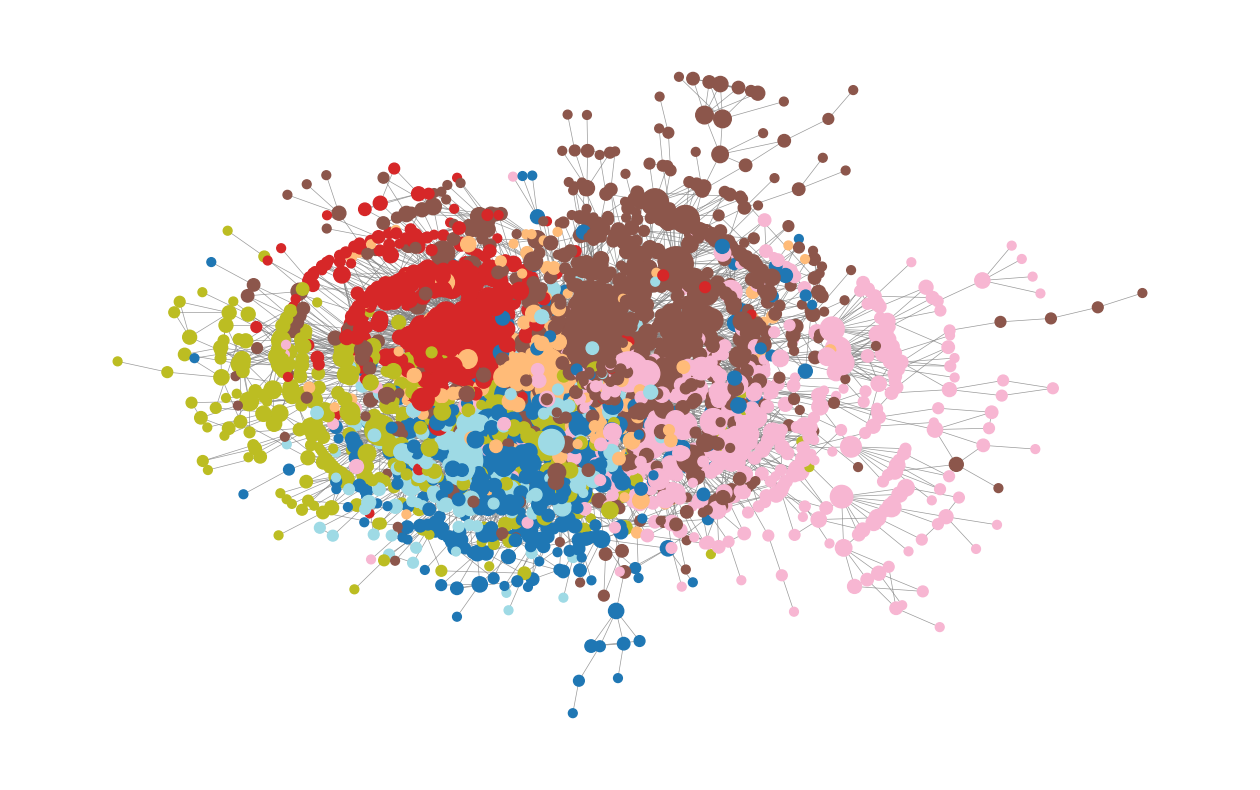

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.datasets import Planetoid

# Load the Cora Dataset
dataset = Planetoid(root='data/Cora', name='Cora')
data = dataset[0]

# Create a Networkx graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(data.y)):
    G.add_node(i)

# Add edges to the graph
edge_index = data.edge_index.t().tolist()
G.add_edges_from(edge_index)

# Calculate node degrees
node_degrees = dict(G.degree)

# Set node sizes based on node degrees
node_sizes = [20 * (node_degrees[node] + 1) for node in G.nodes]

# Create a color map based on node labels
num_labels = len(np.unique(data.y))
color_map = plt.get_cmap('tab20', num_labels)  # Use tab20 colormap for distinct colors

# Create a list of node colors based on node labels
node_colors = [color_map(data.y[node].item() % num_labels) for node in G.nodes]

# Draw the graph with Kamada-Kawai layout for better edge visibility
plt.figure(figsize=(16, 10))  # Larger figure size
pos = nx.kamada_kawai_layout(G)

# Draw edges with larger width for better visibility
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.8, edge_color='gray')

# Draw nodes with colors and sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)

# Optionally, you can remove the node labels
# nx.draw_networkx_labels(G, pos, labels=None, font_size=10, font_color='black')

# Show the plot
plt.axis('off')
plt.show()
